### 2. Preguntas a resolver

In [1]:
##Importar las librerías requeridas para el análisis
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
##Definir tamaño máximo de filas a mostrar
pd.set_option('display.max_rows', 100)

In [4]:
##Importar el dataset del CSV
motores_df = pd.read_csv('../data/hurto_motocicletasV2.csv')

In [7]:
##Visualizar los primeros datos
motores_df

,DEPARTAMENTO,MUNICIPIO,CODIGO DANE,ARMAS MEDIOS,FECHA HECHO,GENERO,GRUPO ETARIO,TIPO DE HURTO,CANTIDAD
0,ANTIOQUIA,MEDELLÍN,5001,ARMA DE FUEGO,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
1,ANTIOQUIA,OPACABANA,5212,LLAVE MAESTRA,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
2,ANTIOQUIA,MEDELLÍN,5001,LLAVE MAESTRA,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
3,CUNDINAMARCA,BOGOTÁ D.C.,11001,LLAVE MAESTRA,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
4,VALLE,ALI,76001,LLAVE MAESTRA,1/01/2010,NO APLICA,NO APLICA,HURTO AUTOMOTORES,1
...,...,...,...,...,...,...,...,...,...
276799,NARIÑO,IPIALES,52356,NO REPORTA,08/04/2022,NO APLICA,NO APLICA,HURTO MOTOCICLETAS,1
276800,TOLIMA,ESPINAL,73268,NO REPORTA,02/04/2022,NO APLICA,NO APLICA,HURTO MOTOCICLETAS,1
276801,VALLE,GUADALAJARA DE BUGA,76111,NO REPORTA,11/02/2022,NO APLICA,NO APLICA,HURTO MOTOCICLETAS,1
276802,VALLE,SEVILLA,76736,NO REPORTA,06/01/2022,NO APLICA,NO APLICA,HURTO MOTOCICLETAS,1


#### 2.1. ¿Cuáles han sido los departamentos (TOP 3) más afectados en términos de cantidad de delitos cometidos en los últimos 5 años?

In [8]:
##Departamentos con mayor número de delitos registrados
motores_df['FECHA HECHO'] = pd.to_datetime(motores_df['FECHA HECHO'], format = '%d/%m/%Y')
motores_df['FECHA HECHO'].dt.year
motores_df.groupby(['DEPARTAMENTO']).apply(lambda x: x[x['FECHA HECHO'].dt.year>2017]['CANTIDAD'].sum()).sort_values(ascending=False).head(3)

DEPARTAMENTO
CUNDINAMARCA    34231
ANTIOQUIA       33343
VALLE           23109
dtype: int64

##### R:// Cundinamarca (20,94%), Antioquia (20,40%) y Valle (14,14%) presentan en los últimos 5 años la mayor cantidad de delitos registrados a automotores y motocicletas. Como es de esperarse, las ciudades con un número mayor de habitantes presenta mas robos.

#### 2.2. Para los casos en los que aplique, ¿cuál ha sido el arma o medio más común para cometer el delito.# Arma o medio más común

In [10]:
##Visualizamos aquellas armas-medios con las que más se cometen delitos
motores_df.groupby(['ARMAS MEDIOS'])['CANTIDAD'].apply(lambda x : x.astype(int).sum()).sort_values(ascending = False).head(1)

ARMAS MEDIOS
LLAVE MAESTRA    159066
Name: CANTIDAD, dtype: int64

 ###### R:// En este caso se puede observar que utilizando un tipo de llave maestra es la modalidad con la que más se realizan hurtos a automóviles y motocicletas teniendo en cuenta la facilidad con la que actualmente se encuentran duplicados a ciertas referencias de carros.

#### 2.3. Para los casos en los que aplique, ¿cómo ha sido la proporción de géneros y grupos etarios que han estado involucrados en este tipo de delito? ¿Han variado con el paso de los años?

#### 2.4. ¿Se evidencia alguna tendencia para cometer dicho delito en algún mes particular del año?

In [13]:
#Almacenamos los meses y su cantidad de hurtos en un nuevo dataframe
meses = motores_df.groupby(motores_df['FECHA HECHO'].dt.month)['CANTIDAD'].sum()

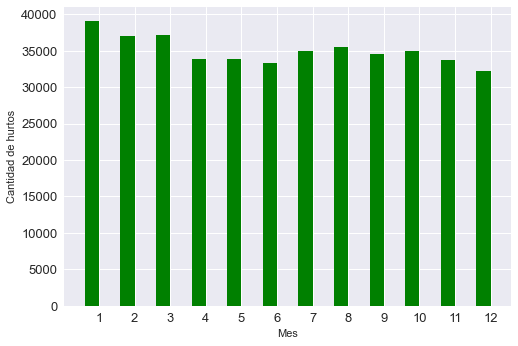

In [14]:
#Graficamos el dataframe para una mejor interpretación de los datos
plt.style.use('seaborn')
ax = meses.plot(kind="bar", width=-0.4, rot=0, stacked=True, align='edge', color='green', ylabel='Cantidad de hurtos', xlabel='Mes', fontsize=13)
plt.autoscale(enable=True, axis='x')
plt.show()

##### R:// En el gráfico anterior se refleja que la mayor cantidad de hurtos cometidos a automóviles y motocicletas son realizados en los tres primeros meses representando el 26,94% de los hurtos registrados. Cabe mencionar que es una temporada usual en el que se incrementan los robos debido a la mayoría de visitantes a diferentes lugares de Colombia pues es una fecha usual en la que la mayoría se encuentra en vacaciones.

#### 2.5 Para los casos en los que se disponga del detalle del delito o de una descripción, como por ejemplo en delitos sexuales y secuestro, ¿cuáles son las descripciones o modalidades más comunes?

In [11]:
#Verificamos la modalidad en la que más se cometen hurtos
motores_df.groupby(motores_df['TIPO DE HURTO']).agg(sum)['CANTIDAD']

TIPO DE HURTO
HURTO AUTOMOTORES     105829
HURTO MOTOCICLETAS    314429
Name: CANTIDAD, dtype: int64

##### R:// Es evidente que el hurto a motocicletas es mucho más común presentando un total de 74,81% ya que como se mencionaba anteriormente la facilidad de llevarse la motocicleta con una llave maestra es muy alta.